# Kendall Outlaw
### Project 7 - Linear Regression
### Task 3 - Read and work through Chapter 10 - Object-Oriented Programming - and understand the examples. 
### 2/23/2023

### Use pandas DataFrames to plot Celsius vs Fahrenheit 

,Fahrenheit,Celsius
0,0,-17.78
1,10,-12.22
2,20,-6.67
3,30,-1.11
4,40,4.44
5,50,10.00
6,60,15.56
7,70,21.11
8,80,26.67
9,90,32.22


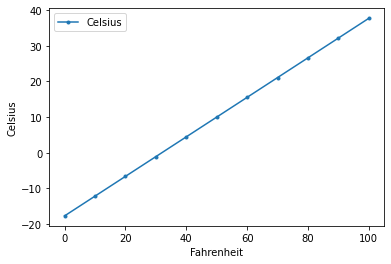

In [21]:
import pandas as pd

c = lambda f: 5 / 9 * (f - 32)

temps = [(f, c(f)) for f in range(0, 101, 10)] 

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

temps_df

### Follow the instructions to load NY City January high temperature from a csv file into a DataFrame.

In [34]:
nyc = pd.read_csv('/Users/maste/OneDrive/Desktop/Northwest Missouri State/44608/1895-2018.csv')
nyc

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0
...,...,...,...
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4


### Follow the instructions to view head and tail of the file. 

In [35]:
# Display NYC Head
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [36]:
# Display NYC Tail
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Follow the instructions to clean the data.

In [37]:
#nyc.set_option('precision', 2)

# Update the names for the dataset columns
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [38]:
# Display the First 3 Rows in the dataset
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [39]:
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Use describe() to calculate basic descriptive statistics for the dataset. 

In [40]:
pd.set_option('display.precision', 2)
print(nyc.describe())

          Date  Temperature  Anomaly
count   124.00       124.00   124.00
mean   1956.50        37.60     0.20
std      35.94         4.54     4.54
min    1895.00        26.10   -11.30
25%    1925.75        34.58    -2.82
50%    1956.50        37.60     0.20
75%    1987.25        40.60     3.20
max    2018.00        47.60    10.20


### Use the SciPy stats module linregress function to calculate slope and intercept for the best fit line through the data.

In [41]:
from scipy import stats
linear_regression = stats.linregress(x = nyc.Date, y = nyc.Temperature)

In [42]:
#Calculate Slope
slope = linear_regression.slope
slope

0.014771361132966163

In [43]:
#Calculate Intercept
intercept = linear_regression.intercept
intercept

8.694993233674289

### Use your results to predict the "average high temp in Jan" for the year 2026. 

In [46]:
linear_regression.slope * 2026 + linear_regression.intercept

38.62177088906374

### Follow the instructions and use Seaborn to generate a scatter plot with a best fit line. Set the axes and y limit as instructed.

(10.0, 70.0)

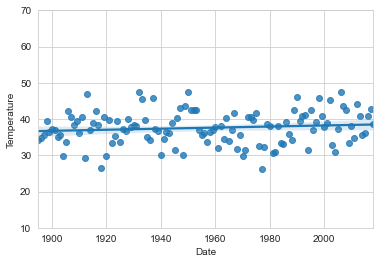

In [48]:
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

### In the same notebook, continue with 15.4 (staring page 620). 

In [51]:
# Import train test split
from sklearn.model_selection import train_test_split
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state = 11)
# Confirm that 75%-25% train-test split by checking the shape of X_train
X_train.shape

(93, 1)

In [52]:
# Confirm that 75%-25% train-test split by checking the shape of X_test
X_test.shape

(31, 1)

## Training the Model

In [54]:
from sklearn.linear_model import LinearRegression
# Import LinearRegression function
from sklearn.linear_model import LinearRegression
# Create estimator
linear_regression2 = LinearRegression()
# Fit model
linear_regression2.fit(X = X_train, y = y_train)
LinearRegression()

LinearRegression()

In [56]:
# Get model slope
slope2 = linear_regression2.coef_
slope2

array([0.01939167])

In [57]:
# Get model intercept
intercept2 = linear_regression2.intercept_
intercept2

-0.30779820252656265

### This time, we'll use scikit-learn estimator, and we'll practice splitting data for training (to build a model) and testing (testing our model against known values). 

## Testing the Model

In [62]:
predicted = linear_regression2.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p: .2f}, expected: {e: .2f}')

predicted:  37.86, expected:  31.70
predicted:  38.69, expected:  34.80
predicted:  37.00, expected:  39.40
predicted:  37.25, expected:  45.70
predicted:  38.05, expected:  32.30
predicted:  37.64, expected:  33.80
predicted:  36.94, expected:  39.70


## New Values are Being Predicted

In [64]:
# Use coefficient and slope of model to predict the average January temperature for 2019
predict = (lambda x: slope2 * x + intercept2)

In [65]:
#predict 2019
predict(2019)

array([38.84399018])

In [66]:
#predict 1890
predict(1890)

array([36.34246432])

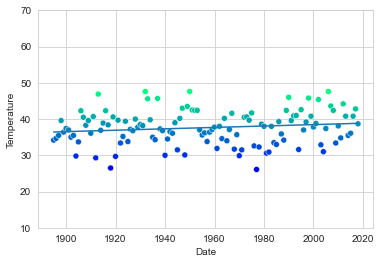

In [67]:
# Create a scatterplot of the temperatures vs the dates
axes2 = sns.scatterplot(data = nyc, x = 'Date', y = 'Temperature', hue = 'Temperature', palette = 'winter', legend = False)
axes2.set_ylim(10, 70)

import numpy as np

# Create array containing minimum and maximum values of the dates
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

# Predict values for x array
y = predict(x)

# Import matplotlib
import matplotlib.pyplot as plt

# Plot best fit line
line = plt.plot(x, y)

## Conclusion

## Two methods for predicting the future January Temperatures are the slope and intercept of the best-fit line and the scikit-learn estimator. Both of these have two different approaches. With the slope and intercept of the best-fit line, we can use Seaborn's regplot function to create a scatter plot. This will plot each data point with the dates on the x-axis and the temperature on the y-axis and the regression line represented as a straight line. In the scikit-learn, we must split the dataset so that we can train and test the model. After these actions are completed, we can predict the values for the years below and abouve the dataset. We can then use a scatter plot to plot the data points.